In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

In [21]:
from helper import read_json
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Plotting bar plots for each cluster
clusters = [
    'Color-I', 'Color-II', 
    'Count-I', 'Count-II',
    'Style-I', 'Style-II',
    'Action-I', 'Action-II',
    'Background-I', 'Background-II',
]

model_str = {
    'Emu': 'Emu',
    'SEED-LLaMA': 'SEED',
    'GILL': 'gill'
}

In [127]:
def check_item(record_dict, x, theta, mode):
    if not record_dict['x'] == x:
        return False
    if not record_dict['theta'] == theta:
        return False
    if mode:
        if not record_dict[mode] == 1:
            return False
        if mode != 'overall':
            if record_dict['overall'] == 1:
                return False
    else:
        if not record_dict['textual'] == 0:
            return False
        if not record_dict['visual'] == 0:
            return False
    return True
    
def get_image(mode, metric, dataset_id, x, theta):
    results_dir = os.path.join(root_dir, 'results')
    detail_folders = [
        os.path.join(results_dir, f'{metric}_evaluation/detail'),
        os.path.join(results_dir, f'{metric}_evaluation_m/detail')
    ]
    all_results = []
    for model in ['seed', 'emu', 'gill']:
        for detail_folder in detail_folders:
            for file in os.listdir(detail_folder):
                if model in file.lower() and f'[{dataset_id}]' in file and not '(' in file:
                    collected_results = read_json(os.path.join(detail_folder, file))
                    for record in collected_results:
                        if check_item(record, x, theta, mode):
                            misleading_flag = '_m' if record['misleading'] else ''
                            record['file_path'] = f"{results_dir}/exps/{model}_prompt1/shot_{record['shot']}{misleading_flag}/task_{dataset_id}/{record['filename']}"
                            all_results.append(record)
    
    return all_results

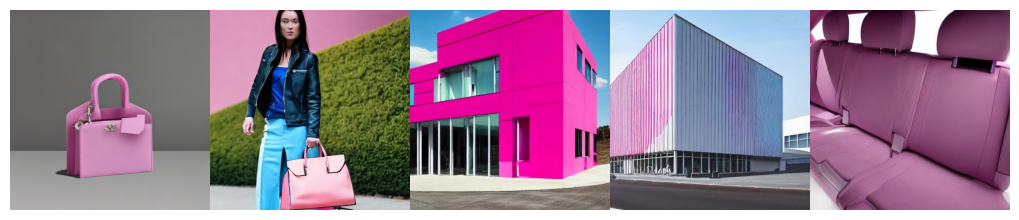

In [179]:
n_rows = 1
n_cols = 5
mode = 'textual'
metric = 'llava'
task_id = 1
x = 'pink'
theta = 'car'

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace = 0) #margin of the figure

results = [
    get_image(mode, metric, task_id, x, theta)[i]
    for i in [0,3,4,5,6]
]
# results = get_image( mode, metric, task_id, x, theta)

for i, ax in enumerate(axes.flatten()):
    if i < n_rows * n_cols:
        image = plt.imread(results[i]['file_path'])
        ax.imshow(image)
        ax.axis('off')  # Turn off axis
    else:
        ax.axis('off')  # Ensure no empty subplot has visible axis

plt.tight_layout(pad=0)
fig.savefig(f'{root_dir}/figures/vis_gen_image_{mode}_{metric}_{x}_{theta}.pdf')
plt.show()

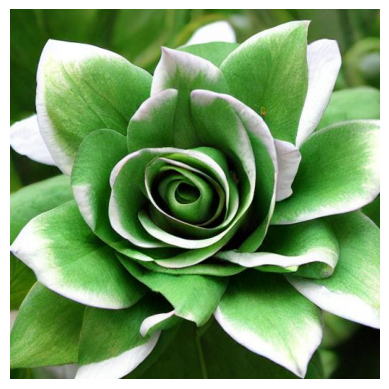

In [20]:


# Path to your image
image_path = results[2]['file_path']

# Open the image
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()
